In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#loasding the datasets
df = pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
#Extracting Independents/features variables
x = df.drop(["CustomerID","Genre","Age"],axis=1)
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [4]:
#Changing the columns name
x = x.rename(columns={
    "Annual Income (k$)":"annual_income",
    "Spending Score (1-100)":"spending_score"
})
x

,annual_income,spending_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


<AxesSubplot:xlabel='annual_income', ylabel='spending_score'>

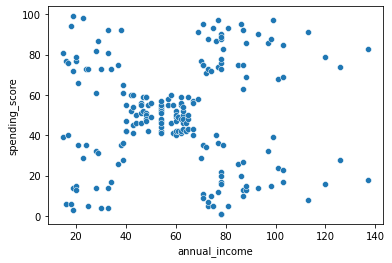

In [5]:
#Visualizing
import seaborn as sns
sns.scatterplot(x = "annual_income",y = "spending_score",data=x)

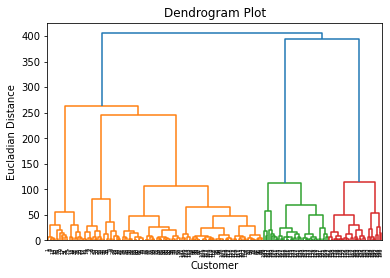

In [6]:
#Finding the the optimal number of clusters using the elbow method
import scipy.cluster.hierarchy as shc
dendro = shc.dendrogram(shc.linkage(x,method='ward'))
plt.title("Dendrogram Plot")
plt.xlabel("Customer")
plt.ylabel("Eucladian Distance")
plt.show()

In [7]:
#training the hierarchical model on datasets
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5,affinity="euclidean",linkage='ward')


In [8]:
hc.fit(x)
x['cluster'] = hc.labels_
x

,annual_income,spending_score,cluster
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4
...,...,...,...
195,120,79,2
196,126,28,0
197,126,74,2
198,137,18,0


# Visualizing the clusters using Seaborn and Matplotlib library

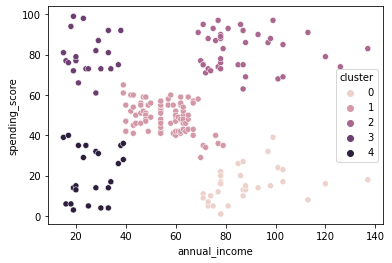

In [9]:
#Visualizing the clustering
import seaborn as sns
sns.scatterplot(x="annual_income",y="spending_score",hue="cluster",data=x)
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],label="centroid")
#plt.legend()
plt.show()

# Visualizing the clusters only using Matplotlib library

In [10]:
#converting Independent DataFrame to Numpy Array
x = x.values
x

array([[ 15,  39,   4],
       [ 15,  81,   3],
       [ 16,   6,   4],
       [ 16,  77,   3],
       [ 17,  40,   4],
       [ 17,  76,   3],
       [ 18,   6,   4],
       [ 18,  94,   3],
       [ 19,   3,   4],
       [ 19,  72,   3],
       [ 19,  14,   4],
       [ 19,  99,   3],
       [ 20,  15,   4],
       [ 20,  77,   3],
       [ 20,  13,   4],
       [ 20,  79,   3],
       [ 21,  35,   4],
       [ 21,  66,   3],
       [ 23,  29,   4],
       [ 23,  98,   3],
       [ 24,  35,   4],
       [ 24,  73,   3],
       [ 25,   5,   4],
       [ 25,  73,   3],
       [ 28,  14,   4],
       [ 28,  82,   3],
       [ 28,  32,   4],
       [ 28,  61,   3],
       [ 29,  31,   4],
       [ 29,  87,   3],
       [ 30,   4,   4],
       [ 30,  73,   3],
       [ 33,   4,   4],
       [ 33,  92,   3],
       [ 33,  14,   4],
       [ 33,  81,   3],
       [ 34,  17,   4],
       [ 34,  73,   3],
       [ 37,  26,   4],
       [ 37,  75,   3],
       [ 38,  35,   4],
       [ 38,  92

In [11]:
y_pred = hc.fit_predict(x)
y_pred

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

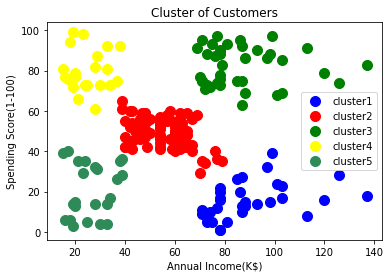

In [12]:
#Visualizing the clusters
plt.scatter(x[y_pred==0,0],x[y_pred==0,1],s=100,c='blue',label="cluster1")
plt.scatter(x[y_pred==1,0],x[y_pred==1,1],s=100,c='red',label="cluster2")
plt.scatter(x[y_pred==2,0],x[y_pred==2,1],s=100,c='green',label="cluster3")
plt.scatter(x[y_pred==3,0],x[y_pred==3,1],s=100,c='yellow',label="cluster4")
plt.scatter(x[y_pred==4,0],x[y_pred==4,1],s=100,c='seagreen',label="cluster5")


plt.title("Cluster of Customers")
plt.xlabel("Annual Income(K$)")
plt.ylabel("Spending Score(1-100)")
plt.legend()
plt.show()